In [7]:
import sys
sys.path.append("../")

import torch

from tdoa.visualization import plot_mics_and_sources
from neural_tdoa.model import TdoaCrnn
from neural_tdoa.utils.load_config import load_config
from datasets.dataset import TdoaDataset


def load_model():
    model = TdoaCrnn()
    
#     weights = torch.load("../tests/fixtures/weights.pth",
#                          map_location=torch.device('cpu'))
#     weights = torch.load("../weights.pth",
#                          map_location=torch.device('cpu'))
    weights = torch.load("C:/Users/ericg/Downloads/50epochs-w-delay/2021-09-09/11-17-46/lightning_logs/version_0/checkpoints/weights.pth",
                         map_location=torch.device('cpu'))
    
    
    model.load_state_dict(weights)
    model.eval()

    return model

def eval_model(model, x):
    with torch.no_grad():
        return model(x)

model = load_model()
config = load_config()
dataset = TdoaDataset(config["validation_dataset"])

In [8]:
import numpy as np
import matplotlib.pyplot as plt

output_dicts = []

def error(y_gt, y_pred):
    return np.sqrt((y_gt - y_pred)**2)
for sample in dataset:
    x,y = sample
    prediction = float(eval_model(model, x.unsqueeze(0)).numpy())
    gt = float(y["target"].numpy())
    error_val = error(gt, prediction)
    print(f"ground_truth: {gt} prediction: {prediction}, error: {error_val}")
    
    y["prediction"] = prediction
    y["error"] = error_val
    output_dicts.append(y)
    
#     room_dims = eval(sample[0]["room_dims"])
#     mics = eval(sample[0]["mic_coordinates"])
#     sources = [eval(sample[0]["source_coordinates"])]
#     plot_mics_and_sources(room_dims, mics, sources)
#     plt.show()

output_dicts.sort(key=lambda x: x["error"], reverse=True)


ground_truth: 0.8478850722312927 prediction: 0.9433298707008362, error: 0.09544479846954346
ground_truth: 0.7089767456054688 prediction: 0.8815333843231201, error: 0.17255663871765137
ground_truth: 0.04322236776351929 prediction: 0.03735426068305969, error: 0.005868107080459595
ground_truth: 0.24864880740642548 prediction: 0.1687612533569336, error: 0.07988755404949188
ground_truth: 0.768873393535614 prediction: 0.9462012648582458, error: 0.17732787132263184
ground_truth: 0.43306413292884827 prediction: 0.6197229027748108, error: 0.18665876984596252
ground_truth: 0.8196201920509338 prediction: 0.9395278096199036, error: 0.11990761756896973
ground_truth: 0.21375428140163422 prediction: 0.3362291753292084, error: 0.12247489392757416
ground_truth: 0.19544851779937744 prediction: 0.22103306651115417, error: 0.025584548711776733
ground_truth: 0.22528484463691711 prediction: 0.30803945660591125, error: 0.08275461196899414
ground_truth: 0.9973796606063843 prediction: 0.9757958054542542, error

ground_truth: 0.8868356943130493 prediction: 0.939558744430542, error: 0.052723050117492676
ground_truth: 0.08174912631511688 prediction: 0.057650841772556305, error: 0.024098284542560577
ground_truth: 0.8109081983566284 prediction: 0.9607771635055542, error: 0.14986896514892578
ground_truth: 0.9981382489204407 prediction: 0.9606775045394897, error: 0.03746074438095093
ground_truth: 0.4676406681537628 prediction: 0.7744146585464478, error: 0.30677399039268494
ground_truth: 0.4156457781791687 prediction: 0.2634478509426117, error: 0.152197927236557
ground_truth: 0.457658976316452 prediction: 0.7063247561454773, error: 0.24866577982902527
ground_truth: 0.1543297916650772 prediction: 0.3186202645301819, error: 0.16429047286510468
ground_truth: 0.24924349784851074 prediction: 0.3864302933216095, error: 0.13718679547309875
ground_truth: 0.34191614389419556 prediction: 0.6947423219680786, error: 0.35282617807388306
ground_truth: 0.3177216053009033 prediction: 0.429348349571228, error: 0.1116

Error mean: 0.11324748125715511 Error std: 0.0878481662308113
Prediction 0.5413931608200073, Error: 0.38244034349918365, delay_in_ms: 4.924765110015869


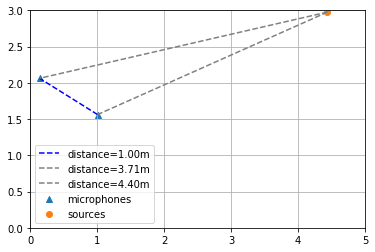

Prediction 0.9245429039001465, Error: 0.37642788887023926, delay_in_ms: 4.71315336227417


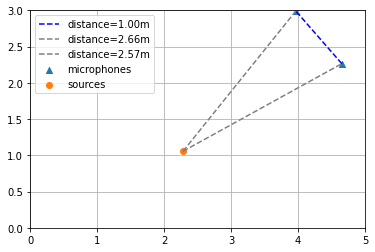

Prediction 0.451244592666626, Error: 0.3696713298559189, delay_in_ms: 1.1122219562530518


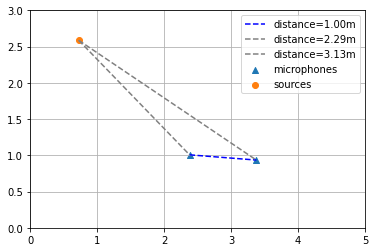

Prediction 0.7217482328414917, Error: 0.3552636504173279, delay_in_ms: 2.745744228363037


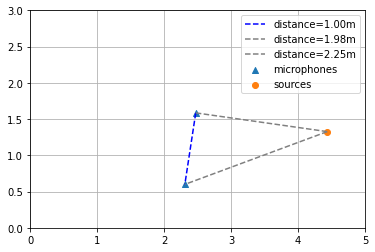

Prediction 0.6947423219680786, Error: 0.35282617807388306, delay_in_ms: 6.906145095825195


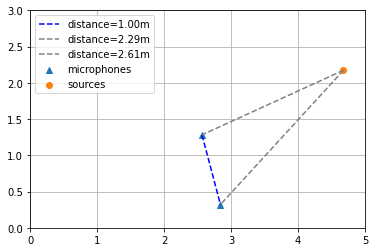

Prediction 0.84673672914505, Error: 0.3439549207687378, delay_in_ms: 5.943200588226318


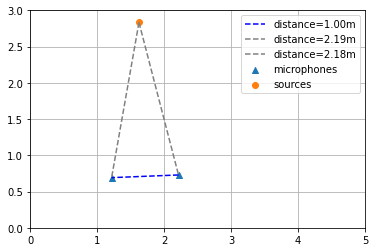

Prediction 0.7744146585464478, Error: 0.30677399039268494, delay_in_ms: 3.8323862552642822


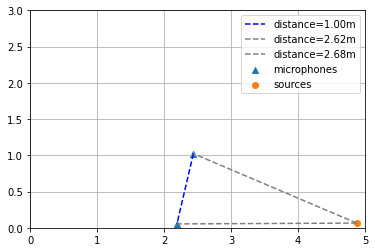

Prediction 0.9366156458854675, Error: 0.27116090059280396, delay_in_ms: 5.449965476989746


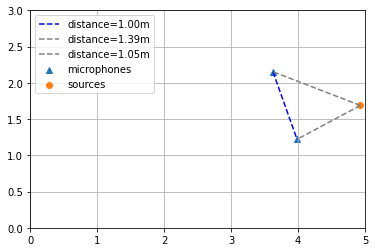

Prediction 0.7814418077468872, Error: 0.27056562900543213, delay_in_ms: 8.538766860961914


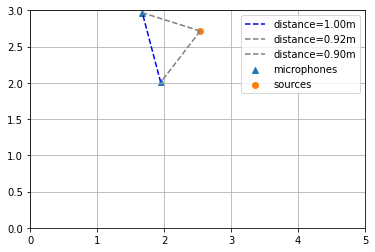

Prediction 0.762863039970398, Error: 0.2674911916255951, delay_in_ms: 5.895847320556641


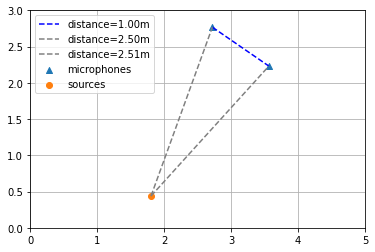

Prediction 0.7770522236824036, Error: 0.25118154287338257, delay_in_ms: 0.5003101229667664


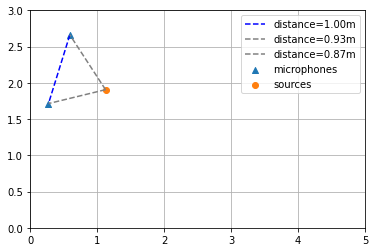

Prediction 0.7063247561454773, Error: 0.24866577982902527, delay_in_ms: 0.26223820447921753


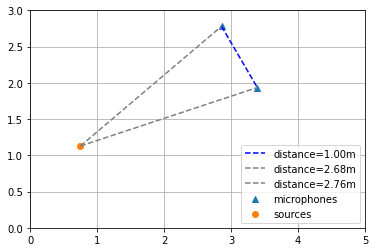

Prediction 0.5940342545509338, Error: 0.24092331528663635, delay_in_ms: 0.7711353898048401


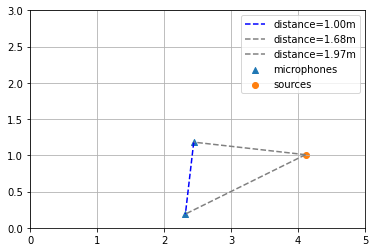

Prediction 0.8547500967979431, Error: 0.23365628719329834, delay_in_ms: 5.568885803222656


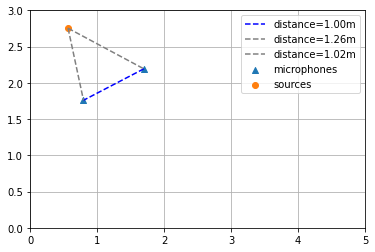

Prediction 0.9500948786735535, Error: 0.22749942541122437, delay_in_ms: 0.6822621822357178


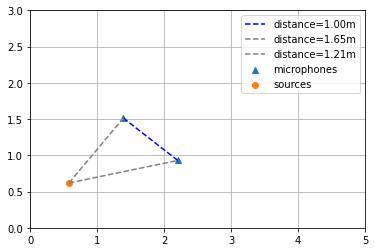

Prediction 0.6327377557754517, Error: 0.22544360160827637, delay_in_ms: 7.969104766845703


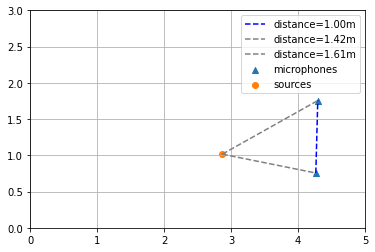

Prediction 0.22205083072185516, Error: 0.2209022177848965, delay_in_ms: 2.0883514881134033


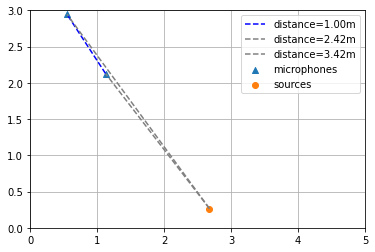

Prediction 0.2243388593196869, Error: 0.218385502230376, delay_in_ms: 9.134730339050293


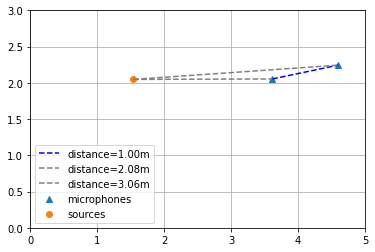

Prediction 0.767291784286499, Error: 0.21209758520126343, delay_in_ms: 2.752253532409668


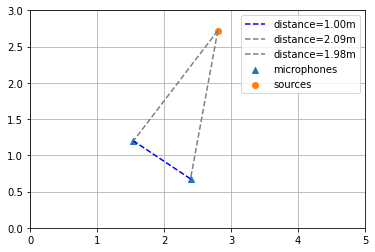

Prediction 0.780387818813324, Error: 0.2070087194442749, delay_in_ms: 9.825836181640625


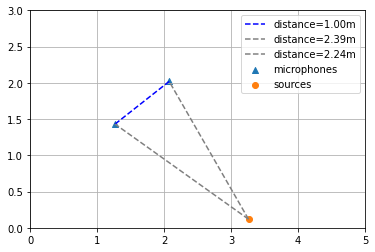

Prediction 0.6866758465766907, Error: 0.20354700088500977, delay_in_ms: 2.321138858795166


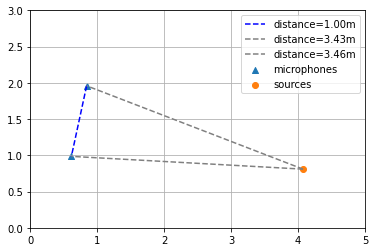

Prediction 0.8582130074501038, Error: 0.2014337182044983, delay_in_ms: 0.6918778419494629


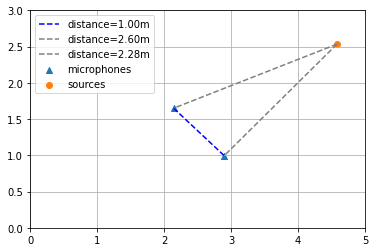

Prediction 0.9315293431282043, Error: 0.19704824686050415, delay_in_ms: 6.4850640296936035


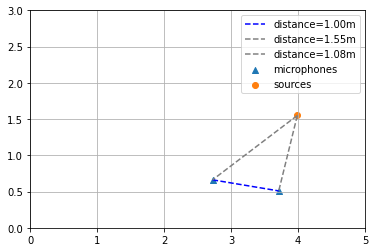

Prediction 0.13446085155010223, Error: 0.19342388212680817, delay_in_ms: 1.3026177883148193


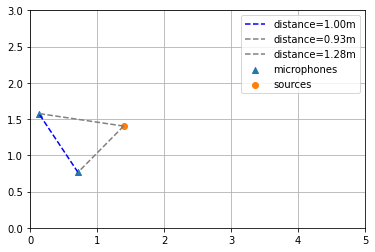

Prediction 0.31117144227027893, Error: 0.1930285394191742, delay_in_ms: 3.985461711883545


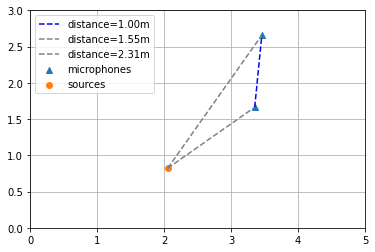

Prediction 0.7898083329200745, Error: 0.1915067434310913, delay_in_ms: 5.480517387390137


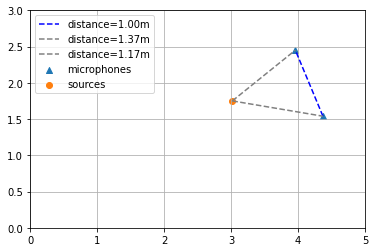

Prediction 0.6197229027748108, Error: 0.18665876984596252, delay_in_ms: 7.033820629119873


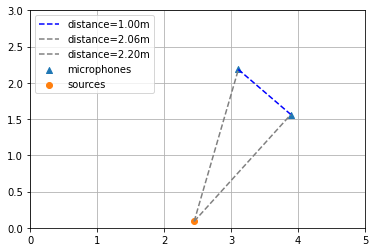

Prediction 0.6874672174453735, Error: 0.18628662824630737, delay_in_ms: 4.284738540649414


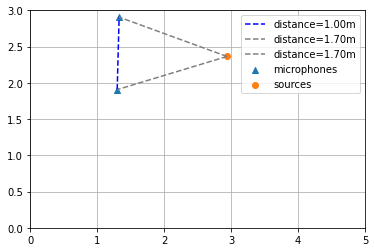

Prediction 0.5429569482803345, Error: 0.18493250012397766, delay_in_ms: 3.823533296585083


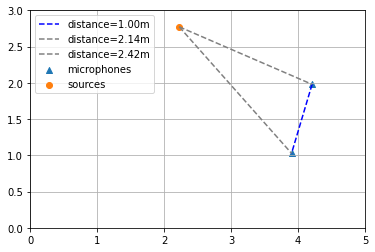

Prediction 0.9544361233711243, Error: 0.18356114625930786, delay_in_ms: 2.121748685836792


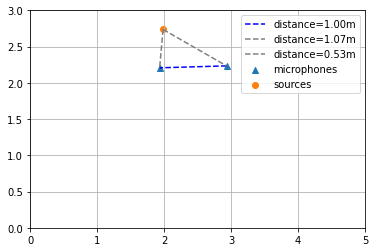

Prediction 0.9051508903503418, Error: 0.18351507186889648, delay_in_ms: 5.442254066467285


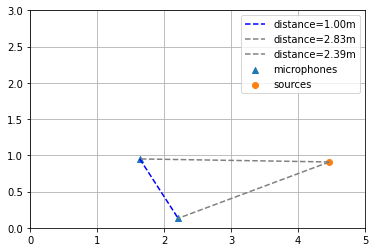

Prediction 0.6284507513046265, Error: 0.1780305802822113, delay_in_ms: 4.5939154624938965


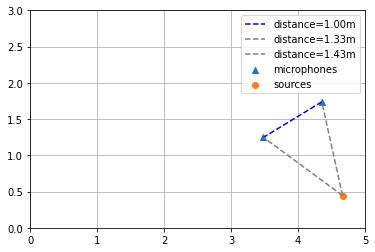

Prediction 0.9462012648582458, Error: 0.17732787132263184, delay_in_ms: 5.487987995147705


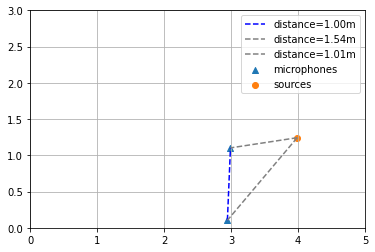

Prediction 0.6661465167999268, Error: 0.1755547821521759, delay_in_ms: 0.8916201591491699


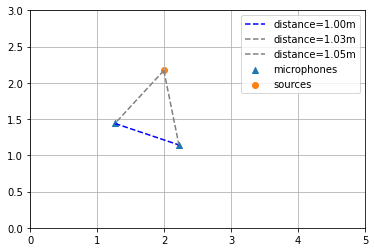

Prediction 0.8815333843231201, Error: 0.17255663871765137, delay_in_ms: 5.911534309387207


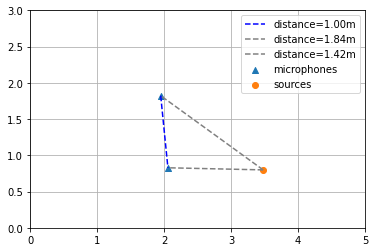

Prediction 0.8510503172874451, Error: 0.17104941606521606, delay_in_ms: 5.380599498748779


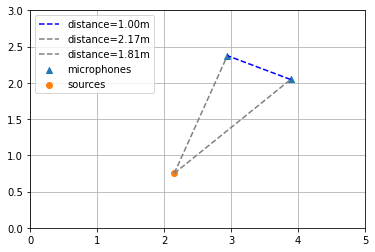

Prediction 0.1956057995557785, Error: 0.17076642625033855, delay_in_ms: 3.495033025741577


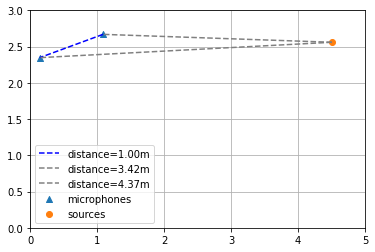

Prediction 0.7223891615867615, Error: 0.17025959491729736, delay_in_ms: 2.444951057434082


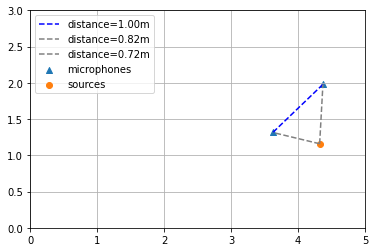

Prediction 0.6606857180595398, Error: 0.16948845982551575, delay_in_ms: 6.960892200469971


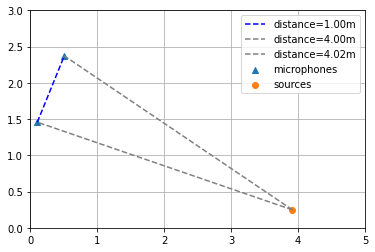

Prediction 0.9397565126419067, Error: 0.1691187024116516, delay_in_ms: 2.824289560317993


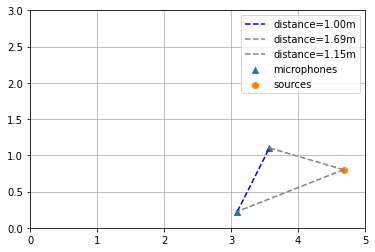

Prediction 0.14866267144680023, Error: 0.16503946483135223, delay_in_ms: 5.041073322296143


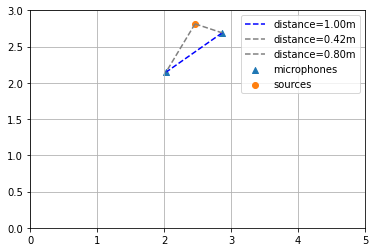

Prediction 0.8079236149787903, Error: 0.1648494005203247, delay_in_ms: 6.178069114685059


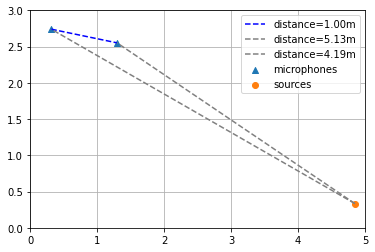

Prediction 0.3186202645301819, Error: 0.16429047286510468, delay_in_ms: 2.5458831787109375


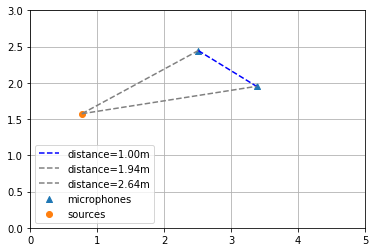

Prediction 0.18772204220294952, Error: 0.16324113309383392, delay_in_ms: 5.3468828201293945


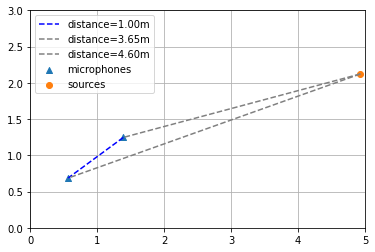

Prediction 0.9168343544006348, Error: 0.15894299745559692, delay_in_ms: 6.586348533630371


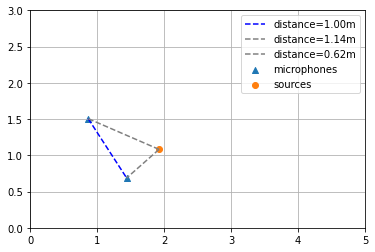

Prediction 0.7560158371925354, Error: 0.15704762935638428, delay_in_ms: 6.054624080657959


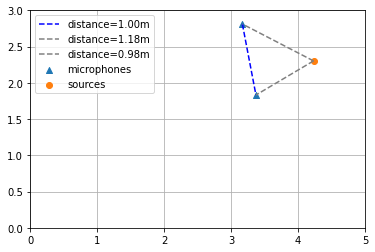

Prediction 0.541100025177002, Error: 0.1554943323135376, delay_in_ms: 6.2003374099731445


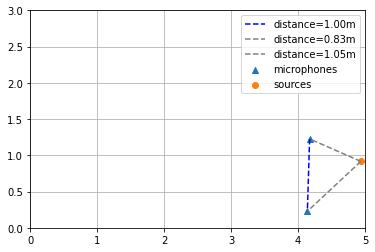

Prediction 0.2634478509426117, Error: 0.152197927236557, delay_in_ms: 4.926251411437988


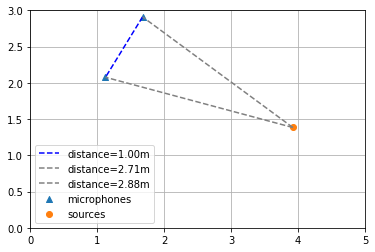

Prediction 0.9607771635055542, Error: 0.14986896514892578, delay_in_ms: 4.2239460945129395


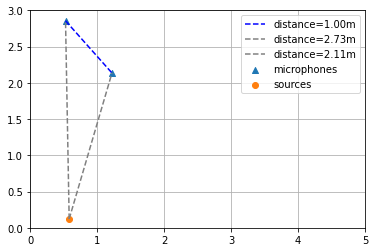

Prediction 0.3510461151599884, Error: 0.14605684578418732, delay_in_ms: 2.4166252613067627


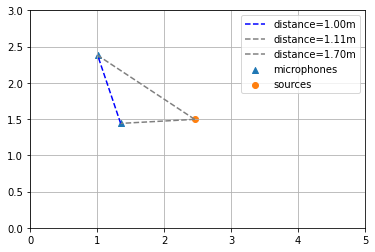

Prediction 0.13392508029937744, Error: 0.14548292756080627, delay_in_ms: 7.662179470062256


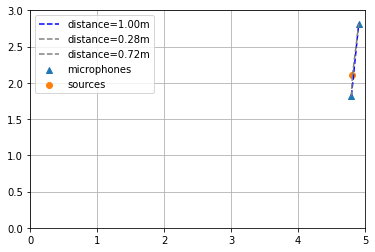

Prediction 0.6415870189666748, Error: 0.13727420568466187, delay_in_ms: 2.508822441101074


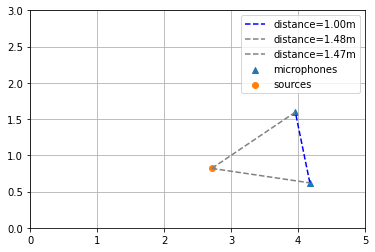

Prediction 0.3864302933216095, Error: 0.13718679547309875, delay_in_ms: 6.624032974243164


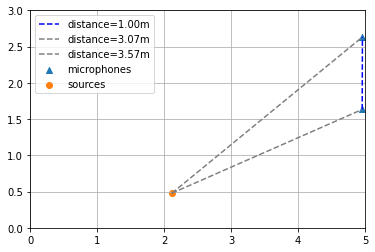

Prediction 0.12414338439702988, Error: 0.13572487980127335, delay_in_ms: 8.780519485473633


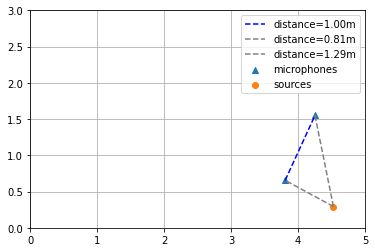

Prediction 0.6955916881561279, Error: 0.1311383843421936, delay_in_ms: 7.989642143249512


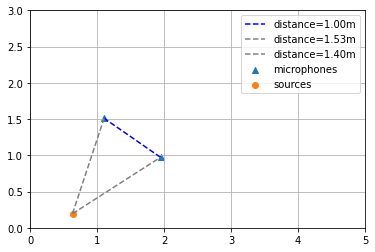

Prediction 0.15465150773525238, Error: 0.13002792187035084, delay_in_ms: 2.463493585586548


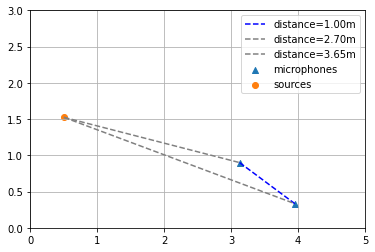

Prediction 0.963687002658844, Error: 0.127244234085083, delay_in_ms: 3.037444829940796


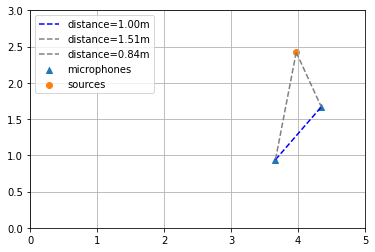

Prediction 0.8753390908241272, Error: 0.12284821271896362, delay_in_ms: 4.056400775909424


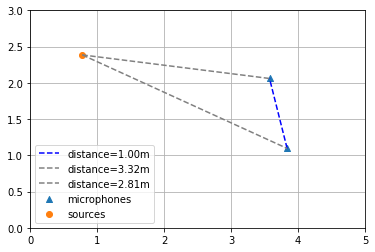

Prediction 0.3362291753292084, Error: 0.12247489392757416, delay_in_ms: 5.124999046325684


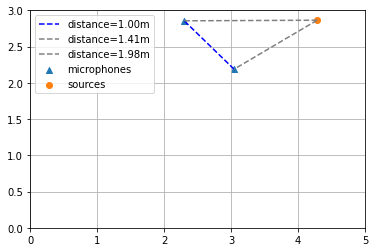

Prediction 0.3080713152885437, Error: 0.1222614049911499, delay_in_ms: 3.2557294368743896


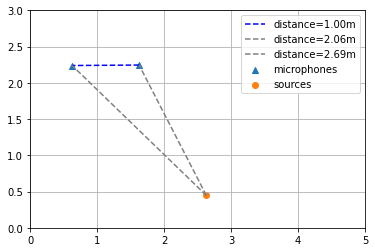

Prediction 0.9395278096199036, Error: 0.11990761756896973, delay_in_ms: 8.474609375


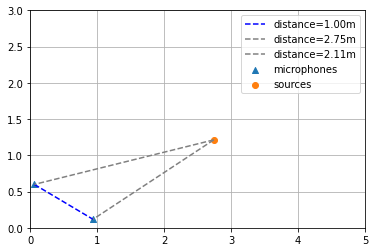

Prediction 0.8744868636131287, Error: 0.11794620752334595, delay_in_ms: 7.702531814575195


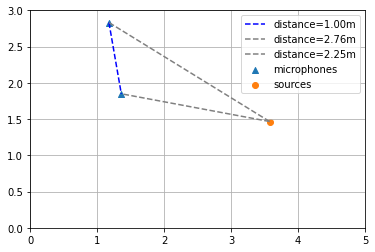

Prediction 0.33933213353157043, Error: 0.11291821300983429, delay_in_ms: 7.510134220123291


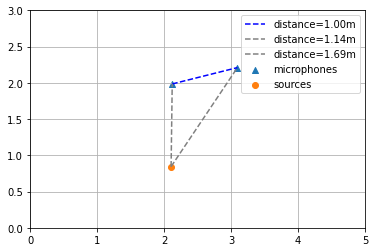

Prediction 0.429348349571228, Error: 0.11162674427032471, delay_in_ms: 5.184772968292236


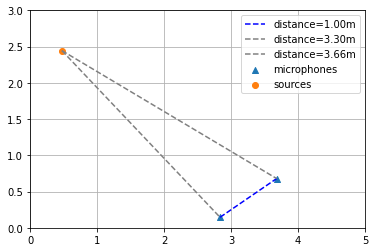

Prediction 0.9332708716392517, Error: 0.11007928848266602, delay_in_ms: 7.0447096824646


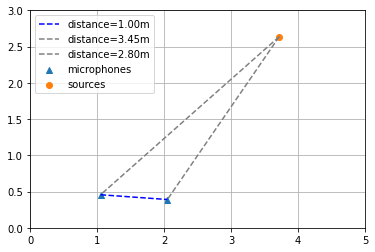

Prediction 0.40603333711624146, Error: 0.10756206512451172, delay_in_ms: 9.17176342010498


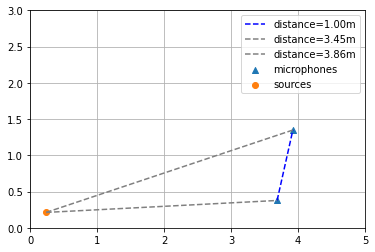

Prediction 0.5678536891937256, Error: 0.10528206825256348, delay_in_ms: 0.1444149762392044


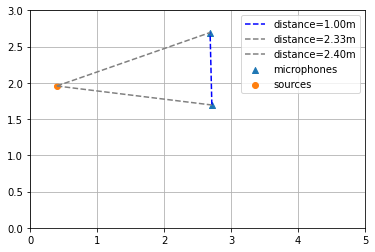

Prediction 0.10957746207714081, Error: 0.10371969966217875, delay_in_ms: 3.365412950515747


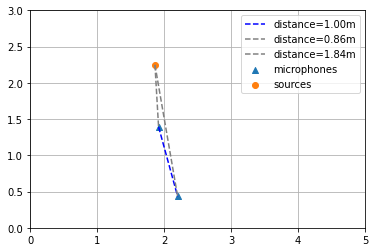

Prediction 0.6673527359962463, Error: 0.10042893886566162, delay_in_ms: 8.873690605163574


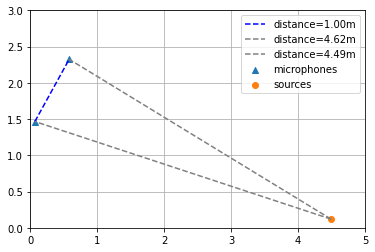

Prediction 0.3315141201019287, Error: 0.09871020913124084, delay_in_ms: 6.078580856323242


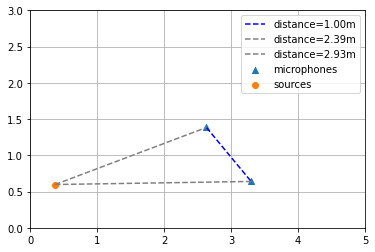

Prediction 0.7652754187583923, Error: 0.09842818975448608, delay_in_ms: 3.3799593448638916


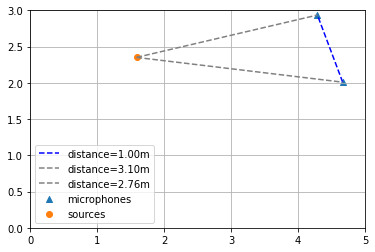

Prediction 0.09132004529237747, Error: 0.09749101847410202, delay_in_ms: 6.991950511932373


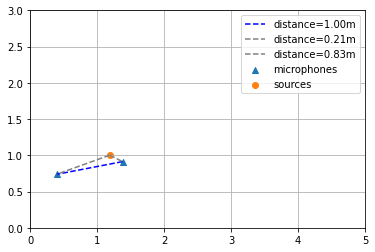

Prediction 0.11704722791910172, Error: 0.09688810259103775, delay_in_ms: 0.9040178656578064


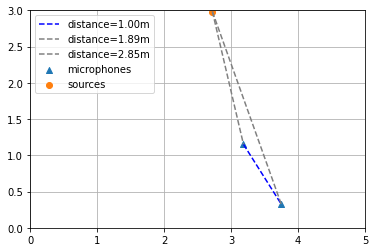

Prediction 0.9433298707008362, Error: 0.09544479846954346, delay_in_ms: 6.51593017578125


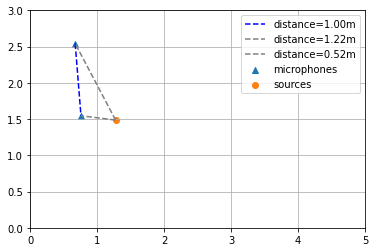

Prediction 0.9719730019569397, Error: 0.09111011028289795, delay_in_ms: 8.88192081451416


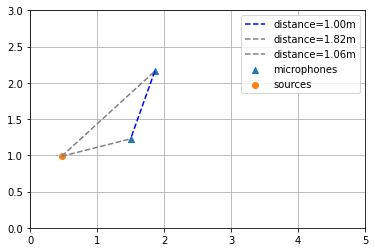

Prediction 0.11709827929735184, Error: 0.08759956993162632, delay_in_ms: 3.0562288761138916


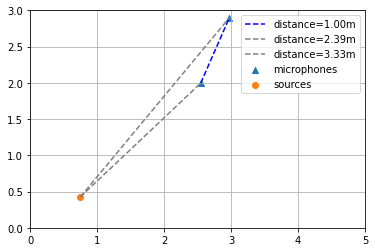

Prediction 0.09922658652067184, Error: 0.08696618769317865, delay_in_ms: 5.789674282073975


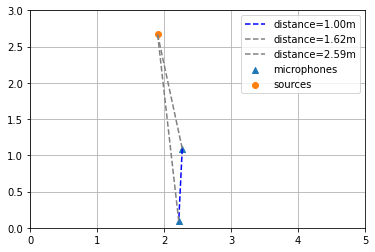

Prediction 0.7280687093734741, Error: 0.08694624900817871, delay_in_ms: 2.0856316089630127


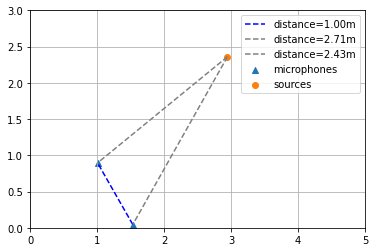

Prediction 0.9280195236206055, Error: 0.08681511878967285, delay_in_ms: 3.3271138668060303


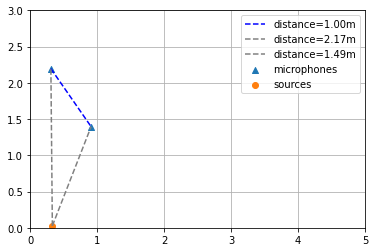

Prediction 0.30803945660591125, Error: 0.08275461196899414, delay_in_ms: 9.309500694274902


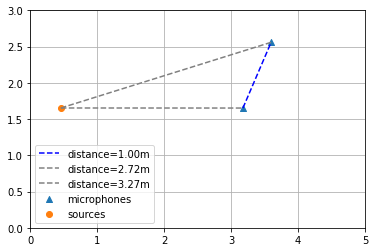

Prediction 0.9167649149894714, Error: 0.08125150203704834, delay_in_ms: 5.29626989364624


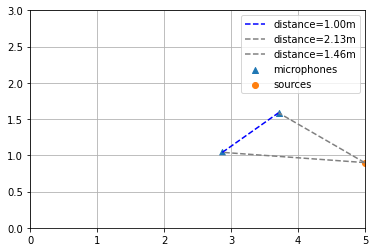

Prediction 0.1687612533569336, Error: 0.07988755404949188, delay_in_ms: 1.8984973430633545


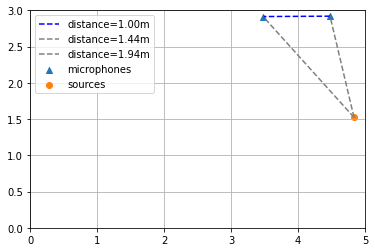

Prediction 0.8545059561729431, Error: 0.07962733507156372, delay_in_ms: 8.407184600830078


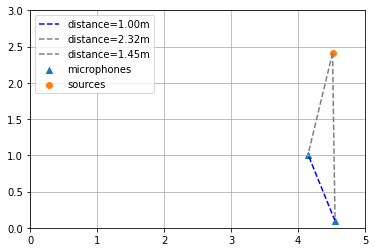

Prediction 0.1274084895849228, Error: 0.07935306429862976, delay_in_ms: 0.5977142453193665


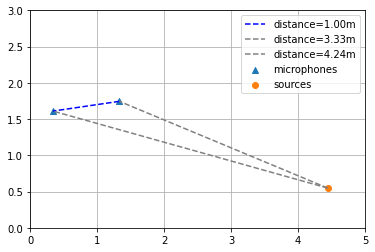

Prediction 0.25925910472869873, Error: 0.07710464298725128, delay_in_ms: 3.895934820175171


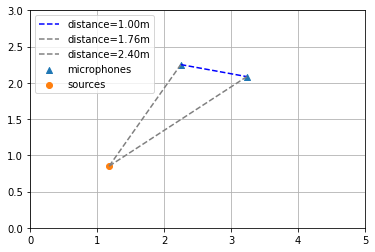

Prediction 0.18005333840847015, Error: 0.07448210567235947, delay_in_ms: 9.723614692687988


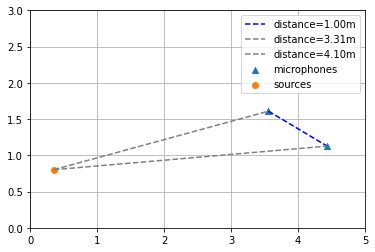

Prediction 0.0959635004401207, Error: 0.07298850268125534, delay_in_ms: 8.003933906555176


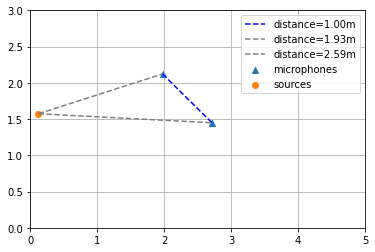

Prediction 0.230688214302063, Error: 0.07145534455776215, delay_in_ms: 9.493463516235352


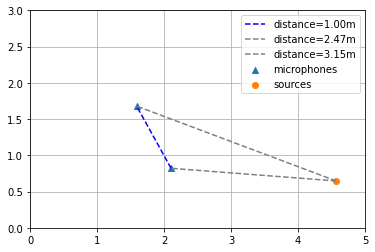

Prediction 0.3547607958316803, Error: 0.0713331401348114, delay_in_ms: 7.258185386657715


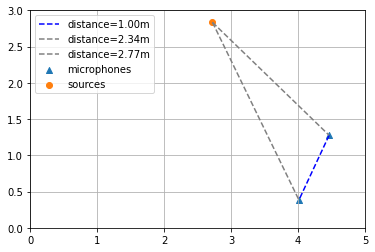

Prediction 0.09982707351446152, Error: 0.07108042389154434, delay_in_ms: 3.79233717918396


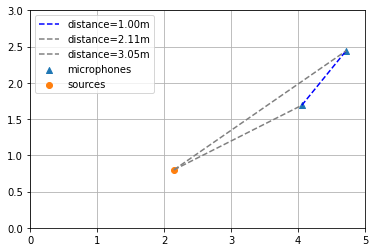

Prediction 0.8477172255516052, Error: 0.06674414873123169, delay_in_ms: 1.3519103527069092


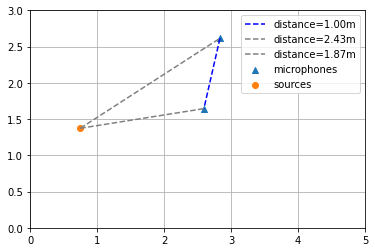

Prediction 0.0777818113565445, Error: 0.06478388607501984, delay_in_ms: 0.008447179570794106


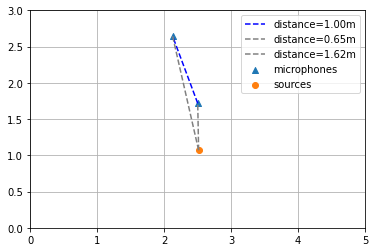

Prediction 0.960768461227417, Error: 0.06440937519073486, delay_in_ms: 7.44915771484375


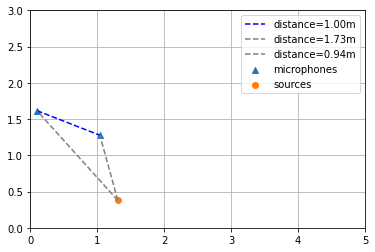

Prediction 0.9713603854179382, Error: 0.06275534629821777, delay_in_ms: 2.3055713176727295


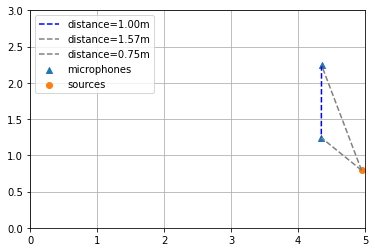

Prediction 0.061629969626665115, Error: 0.06158060396046494, delay_in_ms: 7.383829116821289


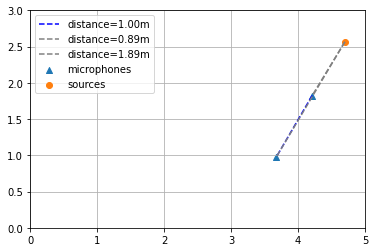

Prediction 0.061502885073423386, Error: 0.061225627548992634, delay_in_ms: 3.026714563369751


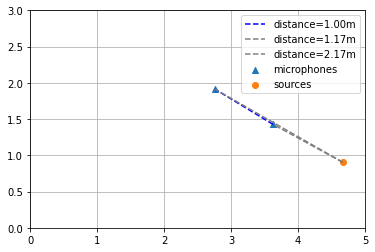

Prediction 0.4944486916065216, Error: 0.06089940667152405, delay_in_ms: 4.575370788574219


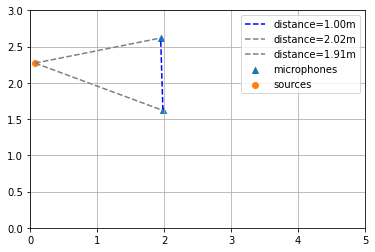

Prediction 0.41848722100257874, Error: 0.05976945161819458, delay_in_ms: 1.1809002161026


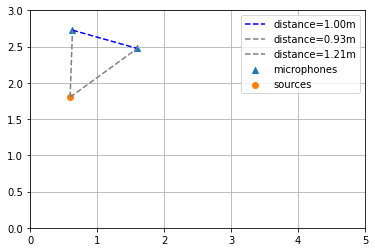

Prediction 0.31261566281318665, Error: 0.059432387351989746, delay_in_ms: 2.517671823501587


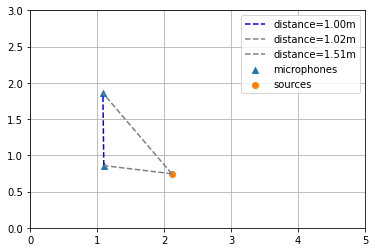

Prediction 0.9683235287666321, Error: 0.05921530723571777, delay_in_ms: 5.845975875854492


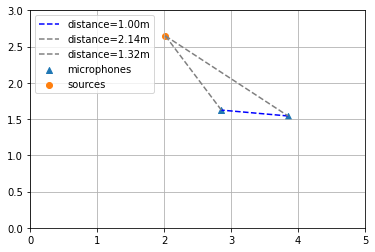

Prediction 0.9537620544433594, Error: 0.058619678020477295, delay_in_ms: 9.640157699584961


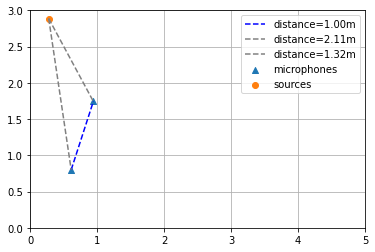

Prediction 0.9810382723808289, Error: 0.05853533744812012, delay_in_ms: 2.708204746246338


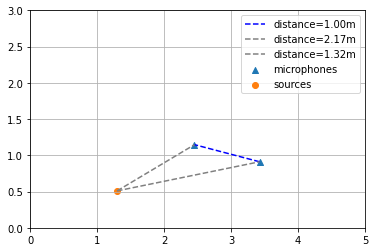

Prediction 0.0595492459833622, Error: 0.057530950754880905, delay_in_ms: 9.533687591552734


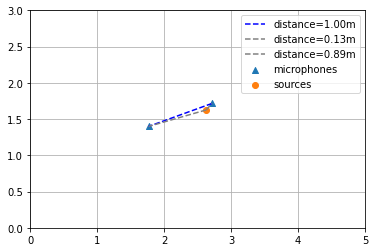

Prediction 0.23243600130081177, Error: 0.056331709027290344, delay_in_ms: 3.9131808280944824


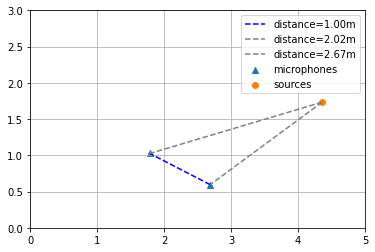

Prediction 0.9589938521385193, Error: 0.05525773763656616, delay_in_ms: 3.3223347663879395


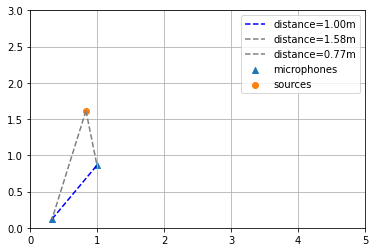

Prediction 0.0446586087346077, Error: 0.054313234984874725, delay_in_ms: 1.1276140213012695


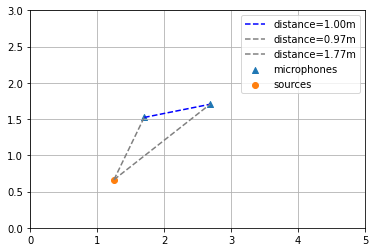

Prediction 0.8191606998443604, Error: 0.05384230613708496, delay_in_ms: 3.1560513973236084


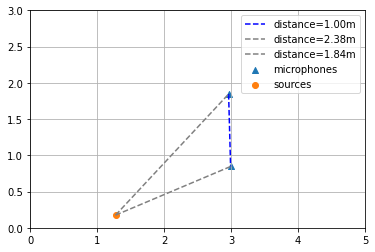

Prediction 0.939558744430542, Error: 0.052723050117492676, delay_in_ms: 7.791397571563721


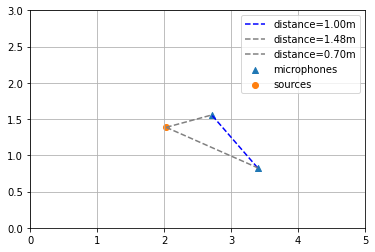

Prediction 0.05259966477751732, Error: 0.05131023284047842, delay_in_ms: 9.888681411743164


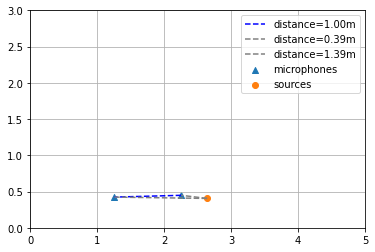

Prediction 0.10391992330551147, Error: 0.04822137951850891, delay_in_ms: 6.197662353515625


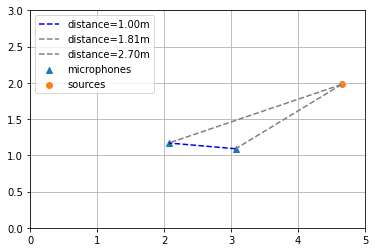

Prediction 0.053171806037425995, Error: 0.047290123999118805, delay_in_ms: 8.146814346313477


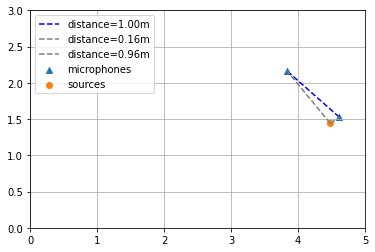

Prediction 0.9594303965568542, Error: 0.0462498664855957, delay_in_ms: 8.377421379089355


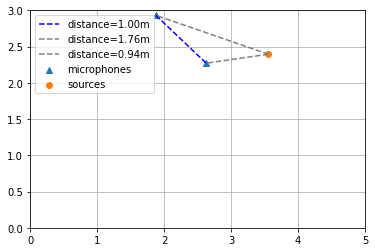

Prediction 0.7157134413719177, Error: 0.045019567012786865, delay_in_ms: 2.476313829421997


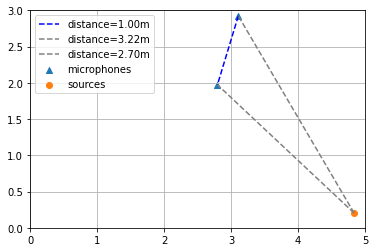

Prediction 0.9662217497825623, Error: 0.04269146919250488, delay_in_ms: 8.45622730255127


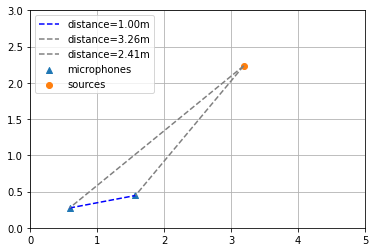

Prediction 0.3953610956668854, Error: 0.04119873046875, delay_in_ms: 8.579950332641602


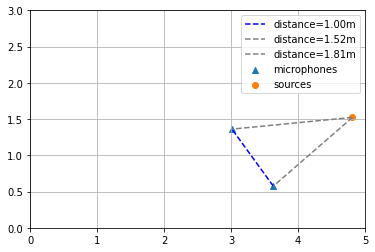

Prediction 0.9586918354034424, Error: 0.04068106412887573, delay_in_ms: 6.01138973236084


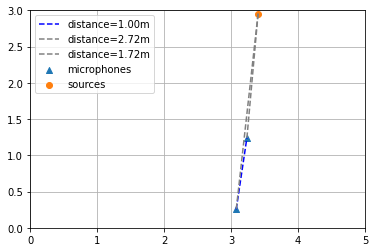

Prediction 0.9820000529289246, Error: 0.040496826171875, delay_in_ms: 3.1268744468688965


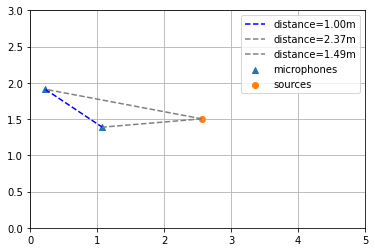

Prediction 0.5703608393669128, Error: 0.04038506746292114, delay_in_ms: 6.520105361938477


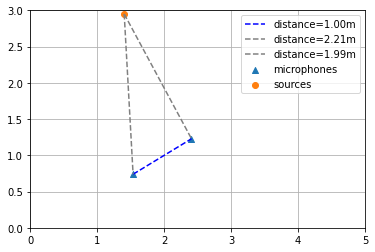

Prediction 0.9606775045394897, Error: 0.03746074438095093, delay_in_ms: 4.4102020263671875


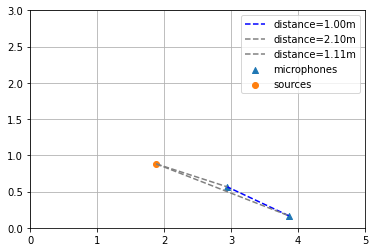

Prediction 0.3865579664707184, Error: 0.03506556153297424, delay_in_ms: 2.2275938987731934


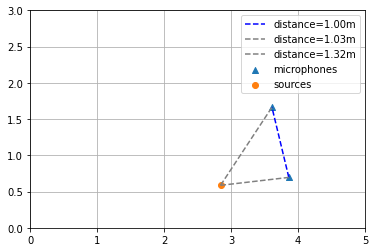

Prediction 0.9569751620292664, Error: 0.0338134765625, delay_in_ms: 2.7948830127716064


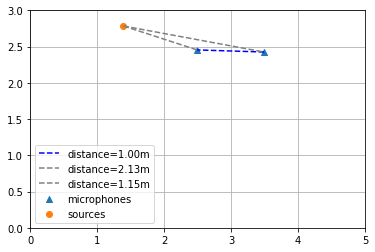

Prediction 0.962967038154602, Error: 0.03313356637954712, delay_in_ms: 7.46988582611084


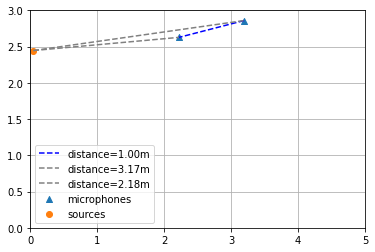

Prediction 0.07242320477962494, Error: 0.03303300216794014, delay_in_ms: 9.987565040588379


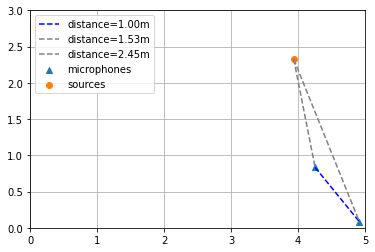

Prediction 0.5101272463798523, Error: 0.031009972095489502, delay_in_ms: 5.010481834411621


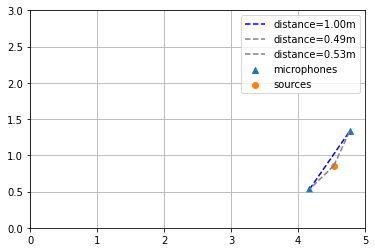

Prediction 0.9679879546165466, Error: 0.027575016021728516, delay_in_ms: 8.074522018432617


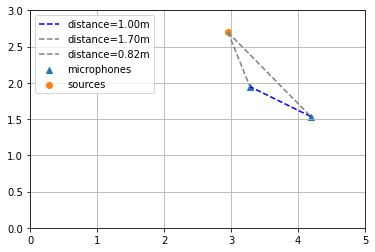

Prediction 0.22103306651115417, Error: 0.025584548711776733, delay_in_ms: 3.4607791900634766


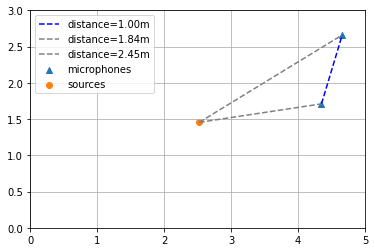

Prediction 0.03702286630868912, Error: 0.024484840221703053, delay_in_ms: 5.521910667419434


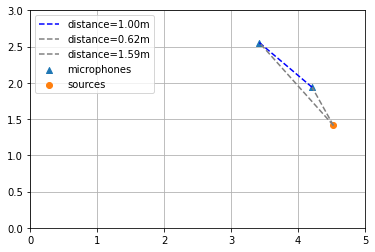

Prediction 0.057650841772556305, Error: 0.024098284542560577, delay_in_ms: 3.5641801357269287


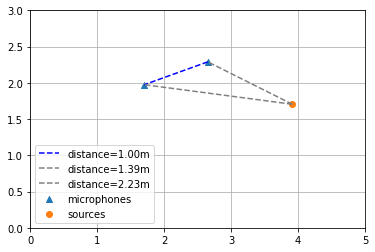

Prediction 0.967496395111084, Error: 0.022228240966796875, delay_in_ms: 1.7151708602905273


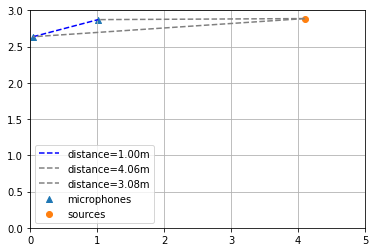

Prediction 0.9700896739959717, Error: 0.021590828895568848, delay_in_ms: 0.7416279315948486


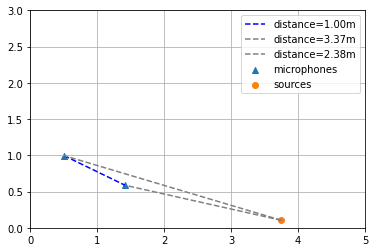

Prediction 0.9757958054542542, Error: 0.021583855152130127, delay_in_ms: 1.8803930282592773


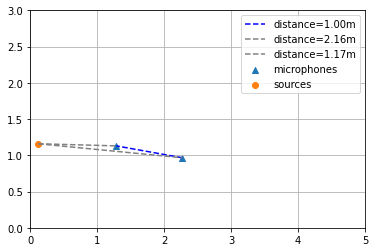

Prediction 0.9725229740142822, Error: 0.02029109001159668, delay_in_ms: 2.4142026901245117


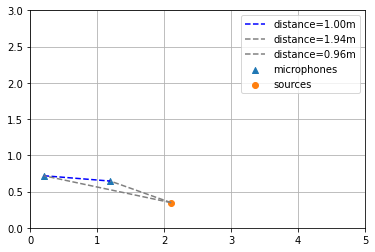

Prediction 0.9589085578918457, Error: 0.020050644874572754, delay_in_ms: 2.4664831161499023


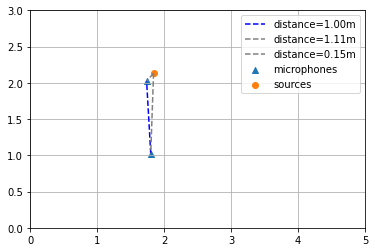

Prediction 0.1358841210603714, Error: 0.017712876200675964, delay_in_ms: 1.522730827331543


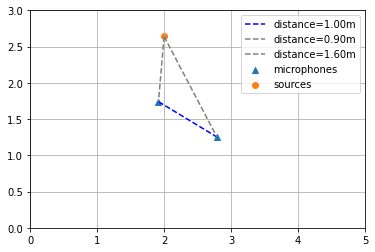

Prediction 0.9692846536636353, Error: 0.017639994621276855, delay_in_ms: 5.00899600982666


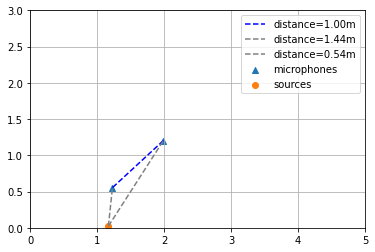

Prediction 0.9778617024421692, Error: 0.017524421215057373, delay_in_ms: 8.075490951538086


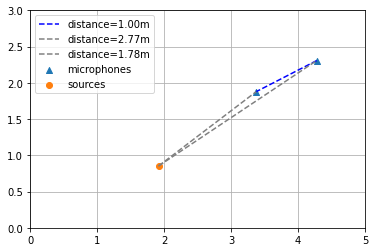

Prediction 0.9613368511199951, Error: 0.016934633255004883, delay_in_ms: 2.5059540271759033


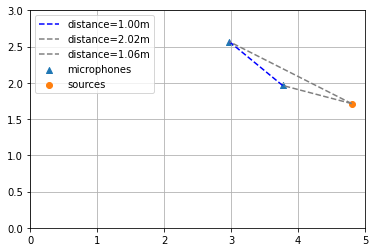

Prediction 0.9443838000297546, Error: 0.016788184642791748, delay_in_ms: 5.800705909729004


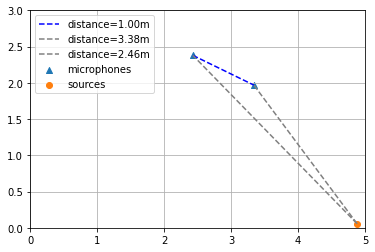

Prediction 0.14393965899944305, Error: 0.016605034470558167, delay_in_ms: 8.627161026000977


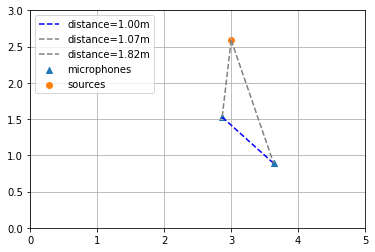

Prediction 0.9173396825790405, Error: 0.015807688236236572, delay_in_ms: 5.8835344314575195


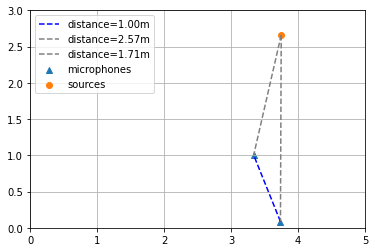

Prediction 0.9890581965446472, Error: 0.010936975479125977, delay_in_ms: 9.496294975280762


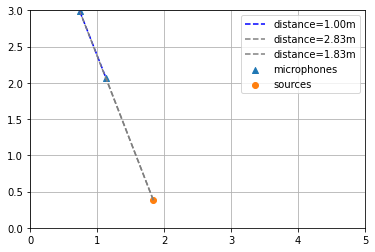

Prediction 0.9585312008857727, Error: 0.009216248989105225, delay_in_ms: 2.4121832847595215


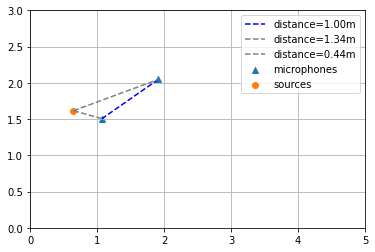

Prediction 0.04373405501246452, Error: 0.007702663540840149, delay_in_ms: 2.995661973953247


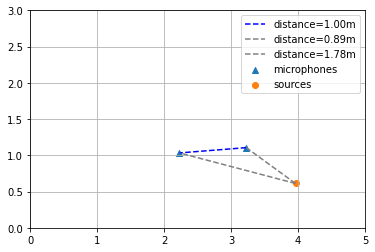

Prediction 0.4418249726295471, Error: 0.006774336099624634, delay_in_ms: 8.593844413757324


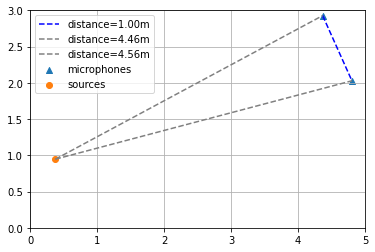

Prediction 0.6948355436325073, Error: 0.0066536664962768555, delay_in_ms: 7.1883544921875


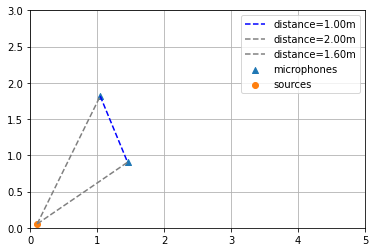

Prediction 0.03735426068305969, Error: 0.005868107080459595, delay_in_ms: 2.3308446407318115


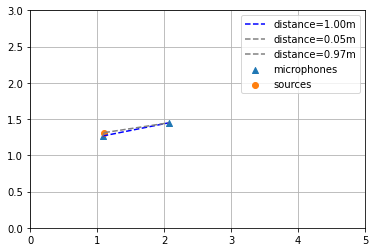

Prediction 0.7296529412269592, Error: 0.005693495273590088, delay_in_ms: 4.7971296310424805


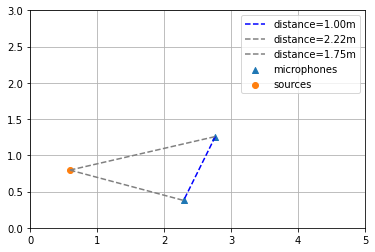

Prediction 0.047155965119600296, Error: 0.004634462296962738, delay_in_ms: 9.522461891174316


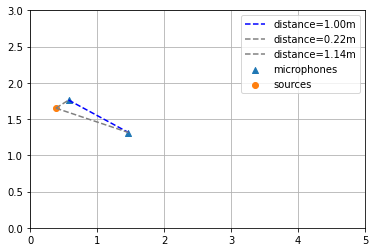

Prediction 0.9662935733795166, Error: 0.000536799430847168, delay_in_ms: 7.461629390716553


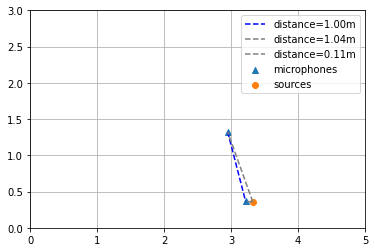

Prediction 0.916567862033844, Error: 0.0002586841583251953, delay_in_ms: 7.507287502288818


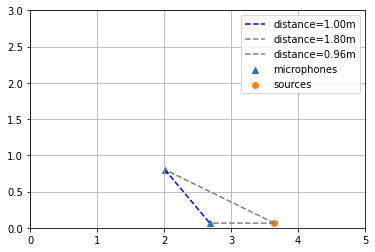

In [9]:
errors = [d["error"] for d in output_dicts]
avg_error = np.mean(errors)
std_error = np.std(errors)
print(f"Error mean: {avg_error} Error std: {std_error}")

for d in output_dicts:
    delay_in_ms = d['mic_delays'][1]*1000
    print(f"Prediction {d['prediction']}, Error: {d['error']}, delay_in_ms: {delay_in_ms}")
    room_dims = d["room_dims"]
    mics = d["mic_coordinates"]
    sources = [d["source_coordinates"]]
    plot_mics_and_sources(room_dims, mics, sources)
    plt.show()

In [4]:
output_dicts[0]

{'Unnamed: 0': 98,
 'room_dims': tensor([5., 3., 3.]),
 'source_coordinates': tensor([4.6789, 2.1739, 1.0000]),
 'mic_coordinates': tensor([[2.5656, 1.2823, 1.0000],
         [2.8410, 0.3209, 1.0000]]),
 'mic_delays': tensor([0.0000, 0.0069]),
 'mic_gains': tensor([1., 1.]),
 'mic_sampling_rates': tensor([16000., 16000.]),
 'tdoa': -0.0009217717890912,
 'normalized_tdoa': 0.3419161381708553,
 'sr': 16000,
 'source_gain': 0.4205243688908295,
 'trim_beginning': True,
 'signals_dir': 'validation_dataset\\samples\\98',
 'target': tensor([0.3419]),
 'prediction': 0.8665748238563538,
 'error': 0.5246586799621582}